2021-06-11<br><br>

NLP 강의 3

## Bag of words

In [118]:
# 전처리 과정에서 문자를 숫자로 벡터화 해왔음
# 1. 통계와 머신러닝 활용한 방법
# 2. 인공신경망을 활용한 방법

# BOW
# 문서들을 단어들의 가방으로 가장하느것
# 단어 순서무시. 전부 섞임
# 중복제거X
# 빈도 정보 그대로 존재

# doc1 = 'John likes to watch movies. Mary likes movies too.'

# BoW1 = {"John":1, "likes":2, "to":1, "watch":1, "movies":2, "Mary":1, "too":1}


# doc2 = 'Mary also likes to watch football games.'  
# BoW2 = {"Mary":1, "also":1, "likes":1, "to":1, "watch":1, "football":1, "games":1}


# doc3 = 'John likes to watch movies. Mary likes movies too. Mary also likes to watch football games.'


## keras Tokenizer를 이용한 BOW

In [119]:
# import

from tensorflow.keras.preprocessing.text import Tokenizer

In [120]:
# 사용할 문장

sentence = ['John likes to watch movies. Mary likes movies too. Mary also likes to watch football games.']

In [121]:
def print_bow(sentence):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(sentence)   
  # 단어장 생성
  bow = dict(tokenizer.word_counts)
  # 각 단어와 각 단어의 빈도를 bow에 저장

  print("Bag of words :", bow)
  print("단어장(vocabulary)의 크기 :", len(tokenizer.word_counts))
  #중복 제거한 단어의 갯수

print_bow(sentence)

Bag of words : {'john': 1, 'likes': 3, 'to': 2, 'watch': 2, 'movies': 2, 'mary': 2, 'too': 1, 'also': 1, 'football': 1, 'games': 1}
단어장(vocabulary)의 크기 : 10


## scikit-learn CountVectorizer활용한 BOW

In [122]:
from sklearn.feature_extraction.text import CountVectorizer

In [123]:
sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]

In [124]:
vector = CountVectorizer()

print("Bag of Words : ", vector.fit_transform(sentence).toarray())
# 코퍼스로부터 각 단어의 빈도수를 기록

print("각 단어의 인덱스 :", vector.vocabulary_)
# 각 단어의 인덱스가 어떻게 부여되었는지 보여줌

print("단어장(vocabulary)의 크기 :", len(vector.vocabulary_))

Bag of Words :  [[1 1 1 1 3 2 2 2 1 2]]
각 단어의 인덱스 : {'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}
단어장(vocabulary)의 크기 : 10


##DTM(Documnet-Term Matrix)

TDM이라고 하는 경우도 있음

문서 1 : I like dog<br>
문서 2 : I like cat<br>
문서 3 : I like cat I like cat<br><br>

<table>
  <tr>
    <th></th><th>cat</th><th>dog</th><th>I</th><th>like</th>
  </tr>
  <tr>
    <td>문서1</td><td>0</td><td>1</td><td>1</td><td>1</td>
  </tr>
  <tr>
    <td>문서2</td><td>1</td><td>0</td><td>1</td><td>1</td>
  </tr>
  <tr>
    <td>문서3</td><td>2</td><td>0</td><td>2</td><td>2</td>
  </tr>
</table>       

In [125]:
import numpy as np
from numpy import dot 
from numpy.linalg import norm

doc1 = np.array([0, 1, 1, 1])
doc2 = np.array([1, 0, 1, 1])
doc3 = np.array([2, 0, 2, 2])

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

In [126]:
# 코사인 유사도 계산

print(cos_sim(doc1, doc2)) 
print(cos_sim(doc1, doc3))
print(cos_sim(doc2, doc3))

# DTM에서는 코사인 유사도는 0이상 1이하의 값을 가지고, 값이 1에 가까울수록 유사도 높다 판단

0.6666666666666667
0.6666666666666667
1.0000000000000002


## scikit-learn CountVectorizer활용한 DTM구현


In [127]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
          'John likes to watch movies',
          'Mary likes movies too',
          'Mary also likes to watch football games',
]

vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray())
# 코퍼스로부터 각 단어의 빈도수 기록
print(vector.vocabulary_)
# 각 단어의 인덱스가 어떻게 부여되었는지 출력

# 단어수가 늘 수록 0이 많아짐(spharse)
# 단어 빈도수에만 치중하는 경향이 있음
# 중요성을 알 수 없음

[[0 0 0 1 1 0 1 1 0 1]
 [0 0 0 0 1 1 1 0 1 0]
 [1 1 1 0 1 1 0 1 0 1]]
{'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


## TF-IDF
DTM의 위와 같은 한계점 때문에 TF-IDF가 등장<br>
모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단<br>
특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단<br><br>

TF-IDF를 사용한 결과가 DTM보다 무조건 좋지는 않음<br>

In [128]:
# import

from math import log
import pandas as pd

In [129]:
docs = [
        'John likes to watch movies and Mary likes movies too',
        'James likes to watch TV',
        'Mary also likes to watch football games',
]

In [130]:
# 단어장 생성

vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

print("단어장의 크기 :", len(vocab))
print(vocab)

단어장의 크기 : 13
['James', 'John', 'Mary', 'TV', 'also', 'and', 'football', 'games', 'likes', 'movies', 'to', 'too', 'watch']


In [131]:
# 문서(문장)의 수

n = len(docs)
n

3

In [132]:
# TF-IDF 구현

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc

  return log(n / (df + 1)) + 1

def tfidf(t, d):
  return tf(t, d) * idf(t)

In [133]:
# tf 함수를 사용하여 DTM 생성

result = []

for i in range(n):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]

    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns=vocab)
tf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0,1,1,0,0,1,0,0,2,2,2,1,1
1,1,0,0,1,0,0,0,0,1,0,1,0,1
2,0,0,1,0,1,0,1,1,1,0,1,0,1


In [134]:
# idf

result = []

for j in range(len(vocab)):
  t = vocab[j]
  result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
James,1.405465
John,1.405465
Mary,1.000000
TV,1.405465
also,1.405465
and,1.405465
football,1.405465
games,1.405465
likes,0.712318
movies,1.405465


In [135]:
# tf-idf 행렬 출력
# 각 단어의 tf에 IDF 곱해준값

result = []

for i in range(n):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]

    result[-1].append(tfidf(t, d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0.000000,1.405465,1.0,0.000000,0.000000,1.405465,0.000000,0.000000,1.424636,2.81093,1.424636,1.405465,0.712318
1,1.405465,0.000000,0.0,1.405465,0.000000,0.000000,0.000000,0.000000,0.712318,0.00000,0.712318,0.000000,0.712318
2,0.000000,0.000000,1.0,0.000000,1.405465,0.000000,1.405465,1.405465,0.712318,0.00000,0.712318,0.000000,0.712318


## scikit-learn TFidVectorizer 활용

In [136]:
# import 

from sklearn.feature_extraction.text import TfidfVectorizer

In [137]:
# data

corpus = [
          "John I likes to watch movies and Mary I likes movies too",
          "James likes to watch TV",
          "Mary also likes to watch football games",
]

In [138]:
tfidfv = TfidfVectorizer().fit(corpus)
vocab = list(set(tfidfv.vocabulary_.keys()))
vocab.sort()

tfidf_ = pd.DataFrame(tfidfv.transform(corpus).toarray(), columns = vocab)
tfidf_

,also,and,football,games,james,john,likes,mary,movies,to,too,tv,watch
0,0.000000,0.321556,0.000000,0.000000,0.000000,0.321556,0.379832,0.244551,0.643111,0.189916,0.321556,0.000000,0.189916
1,0.000000,0.000000,0.000000,0.000000,0.572929,0.000000,0.338381,0.000000,0.000000,0.338381,0.000000,0.572929,0.338381
2,0.464997,0.000000,0.464997,0.464997,0.000000,0.000000,0.274634,0.353642,0.000000,0.274634,0.000000,0.000000,0.274634


## LSA, LDA

이전까지는 bag of word 기반<br>
의미 주제 알고싶지만 이전모델로는 표현 불가했음<br>
이를 해결하기위해 LSA, LDA 가 등장<br><br>

단어와 단어사이 문장과 문장사이 유사성 <br>
효과적인게 많음<br><br>

LSA :<br>
전체 코퍼스에서 문자 속 단어들의 상의 관계를 찾아낸느 자연어 처리 정보탐색 기술<br>
단어와 단어 사이, 문서와 문서 사이, 단어와 문장 사이 유사성 점수를 찾아냄<br>

In [139]:
# import

import pandas as pd
import numpy as np
import urllib.request
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [140]:
! pip install nltk

In [141]:
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [142]:
!pwd

/content


In [143]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/franciscadias/data/master/abcnews-date-text.csv",
                           filename="/content/abcnews-data-text.csv")

('/content/abcnews-data-text.csv', <http.client.HTTPMessage at 0x7f42c708f290>)

In [144]:
data = pd.read_csv('/content/abcnews-data-text.csv', error_bad_lines=False)

In [145]:
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [146]:
text = data [["headline_text"]]
text.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [147]:
text.nunique()

# 3만개 가량이 중복데이터였음

headline_text    1054983
dtype: int64

In [148]:
# 중복 제거

text.drop_duplicates(inplace = True)
text = text.reset_index(drop = True)

print(len(text))

1054983


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### 데이터 정제 및 정규화

In [149]:
# NLTK 토크나이저를 이용해 토큰화

text["headline_text"] = text.apply(lambda row: nltk.word_tokenize(row["headline_text"]), axis = 1)

In [150]:
# 불용어 제거

stop_words = stopwords.words("english")
text["headline_text"] = text["headline_text"].apply(lambda x: [word for word in x if word not in (stop_words)])

In [151]:
text.head()

,headline_text
0,"[aba, decides, community, broadcasting, licence]"
1,"[act, fire, witnesses, must, aware, defamation]"
2,"[g, calls, infrastructure, protection, summit]"
3,"[air, nz, staff, aust, strike, pay, rise]"
4,"[air, nz, strike, affect, australian, travellers]"


In [152]:
# 단어 정규화 과정 
# 길이가 1~2인 단어는 제거하는 전처리 과정임
# 단어 정규화 
# 3인칭 단수 표현 .> 1인칭 변환, 과거형 동사 -> 현재형 동사
# 등을 수행

text["headline_text"] = text["headline_text"].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos = "v") for word in x])

In [153]:
# 길이가 1~2인 단어를 제거

text = text["headline_text"].apply(lambda x: [word for word in x if len(word) > 2])

print(text[:5])

0     [aba, decide, community, broadcast, licence]
1    [act, fire, witness, must, aware, defamation]
2       [call, infrastructure, protection, summit]
3            [air, staff, aust, strike, pay, rise]
4    [air, strike, affect, australian, travellers]
Name: headline_text, dtype: object


In [154]:
# 역토큰화 
# 토큰화 작업을 역으로 수행

detokenized_doc=[]

for i in range(len(text)):
  t = ' '.join(text[i])
  detokenized_doc.append(t)

train_data = detokenized_doc

In [155]:
train_data[:5]

['aba decide community broadcast licence',
 'act fire witness must aware defamation',
 'call infrastructure protection summit',
 'air staff aust strike pay rise',
 'air strike affect australian travellers']

In [156]:
# 상위 5000개 단어만 사용

c_vectorizer = CountVectorizer(stop_words = "english", max_features = 5000)
document_term_matrix = c_vectorizer.fit_transform(train_data)

In [157]:
# DTM의 크기

print('행렬의 크기 : ', document_term_matrix.shape) 
# 문서의 수 X 단어 집합의 크기

행렬의 크기 :  (1054983, 5000)


## scikit-learn Truncated SVD 활용

In [158]:
from sklearn.decomposition import TruncatedSVD

n_topics = 10
lsa_model = TruncatedSVD(n_components = n_topics)
lsa_model.fit_transform(document_term_matrix)

array([[ 0.01208312, -0.00347201,  0.0182566 , ...,  0.00286796,
         0.00124732,  0.01560101],
       [ 0.0290736 , -0.01121828,  0.01829939, ..., -0.00148709,
        -0.01215122, -0.00819526],
       [ 0.00508009, -0.00175831,  0.00970242, ..., -0.00210328,
         0.0017365 ,  0.0033025 ],
       ...,
       [ 0.02969598,  0.00370105,  0.0252737 , ...,  0.02216185,
         0.00875934,  0.01866306],
       [ 0.06334385, -0.00523409,  0.13847997, ...,  0.97840388,
         0.79656213, -0.46934265],
       [ 0.07122255,  0.03425599, -0.00121457, ...,  0.02998473,
        -0.03229205,  0.04109267]])

In [159]:
print(np.shape(lsa_model.components_))

(10, 5000)


In [160]:
terms = c_vectorizer.get_feature_names()

def get_topics(components, feature_names, n=5):
  for idx, topic in enumerate(components):
    print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])

In [161]:
get_topics(lsa_model.components_, terms)

# 새로운 정보 업데이트가 어려움
# 다시 이 과정을 해야하기 때문

Topic 1: [('police', 0.74641), ('man', 0.45354), ('charge', 0.21092), ('new', 0.14085), ('court', 0.11149)]
Topic 2: [('man', 0.69458), ('charge', 0.29939), ('court', 0.16691), ('face', 0.1154), ('murder', 0.10679)]
Topic 3: [('new', 0.83674), ('plan', 0.23653), ('say', 0.18282), ('govt', 0.11095), ('council', 0.1102)]
Topic 4: [('say', 0.73915), ('plan', 0.36123), ('govt', 0.16366), ('council', 0.1274), ('urge', 0.07315)]
Topic 5: [('plan', 0.73342), ('council', 0.17531), ('govt', 0.13674), ('urge', 0.08439), ('water', 0.0723)]
Topic 6: [('govt', 0.51785), ('court', 0.26992), ('urge', 0.22922), ('nsw', 0.17207), ('face', 0.16695)]
Topic 7: [('charge', 0.50032), ('court', 0.47566), ('face', 0.36637), ('plan', 0.11458), ('murder', 0.1094)]
Topic 8: [('win', 0.65409), ('court', 0.28842), ('kill', 0.20107), ('crash', 0.18199), ('australia', 0.09986)]
Topic 9: [('win', 0.56016), ('charge', 0.53357), ('australia', 0.09419), ('council', 0.08354), ('cup', 0.06226)]
Topic 10: [('council', 0.64

In [162]:
# LDA

# 역토큰화 과정을거친
# 앞서 전처리해둔 train 데이터 사용할것임

TF-IDF 행렬 생성

In [163]:
# 상위 5000개의 단어만 사용
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features = 5000)
tf_idf_matrix = tfidf_vectorizer.fit_transform(train_data)

# TF-IDF행렬의 크기를 확인
print('행렬의 크기 : ', tf_idf_matrix.shape)

행렬의 크기 :  (1054983, 5000)


scikit-learn LDA model활용

In [164]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components = 10, learning_method = 'online', random_state = 777, max_iter=1)
lda_model.fit_transform(tf_idf_matrix)

array([[0.0335099 , 0.0335099 , 0.0335099 , ..., 0.17024867, 0.0335099 ,
        0.0335099 ],
       [0.03365631, 0.03365631, 0.03365631, ..., 0.03365631, 0.03365631,
        0.03365631],
       [0.25184095, 0.0366096 , 0.0366096 , ..., 0.0366096 , 0.0366096 ,
        0.0366096 ],
       ...,
       [0.26687206, 0.02914502, 0.02914502, ..., 0.13007484, 0.02916018,
        0.28739608],
       [0.10378115, 0.02637829, 0.12325014, ..., 0.02637829, 0.02637829,
        0.02637829],
       [0.03376055, 0.03376055, 0.2255442 , ..., 0.03376055, 0.03376055,
        0.03376055]])

# word 2 vec

In [1]:
!pip install nltk
!pip install gensim

In [2]:
# import 

import nltk

In [3]:
# nltk에서 필요한 것 다운로드

nltk.download("abc")
nltk.download("punkt")

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Unzipping corpora/abc.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
from nltk.corpus import abc

In [5]:
corpus = abc.sents()

In [6]:
print(corpus[:3])

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ['In', 'one', 'of', 'the', 'letters', 'Mr', 'Howard', 'asks', 'AWB', 'managing', 'director', 'Andrew', 'Lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'Government', 'on', 'Iraq', 'wheat', 'sales', '.']]


In [7]:
# corpus 크기확인

print("코퍼스의 크기 :", len(corpus))
#  약 29000여개의 샘플이 있음

코퍼스의 크기 : 29059


In [8]:
from gensim.models import Word2Vec

In [10]:
model = Word2Vec(sentences = corpus, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

# size : 학습후 차원
# min_count : 최소 빈도수. 이보다 작으면 학습 X
# 0 : cbow, 1: skip gram

In [13]:
# 유사도 테스트

model_result = model.wv.most_similar("man")

print(model_result)

# man과 가장 유사한 것이 woman인 것으로 나옴

[('woman', 0.9355605840682983), ('Bang', 0.9280612468719482), ('asteroid', 0.9213691353797913), ('third', 0.9179359674453735), ('skull', 0.9143943786621094), ('rally', 0.9109689593315125), ('infant', 0.9074746966362), ('baby', 0.9044082164764404), ('dog', 0.9040831923484802), ('conviction', 0.9033709764480591)]


In [14]:
from gensim.models import KeyedVectors

In [15]:
# 모델 로드

model.wv.save_word2vec_format("./w2v")
loaded_model = KeyedVectors.load_word2vec_format("./w2v")

print("모델 load 완료")

모델 load 완료


In [16]:
# 로드한 모델이 이전과 같은 성능을 내는지 테스트

model_result = loaded_model.wv.most_similar("man")
model_result

# word 2 vec은 Oov 문제를 그대로 가지고 있음

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('woman', 0.9355605840682983),
 ('Bang', 0.9280612468719482),
 ('asteroid', 0.9213691353797913),
 ('third', 0.9179359674453735),
 ('skull', 0.9143943786621094),
 ('rally', 0.9109689593315125),
 ('infant', 0.9074746966362),
 ('baby', 0.9044082164764404),
 ('dog', 0.9040831923484802),
 ('conviction', 0.9033709764480591)]

In [17]:
# overacting과 코사인 유사도가 가장 높은 단어 출력

loaded_model.most_similar("overacting")

# 단어장에 존재하지 않는 단어이므로
# 에러가 발생됨

KeyError: ignored

In [19]:
# 코사인 유사도 높은 단어 출력 2

# 단어장에 존재하는 단어의 경우
print(loaded_model.most_similar("memory"))
# 제대로 출력됨

# 단어장에 존재하지 않는 단어의 경우
print(loaded_model.most_similar('memorry'))
# 오류가 발생함

[('jolt', 0.9722740650177002), ('structures', 0.9699009656906128), ('video', 0.9693214893341064), ('chasing', 0.9692908525466919), ('springs', 0.9688944816589355), ('lifting', 0.9688490629196167), ('infection', 0.9673976898193359), ('semen', 0.9667586088180542), ('display', 0.966754674911499), ('charged', 0.9655981063842773)]


KeyError: ignored

In [23]:
# install

!pip install konlpy

In [24]:
# import 

import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [37]:
# 네이버 영화 리뷰 데이터(감정분석과 관련된 데이터) 다운

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7fa457b9de50>)

In [38]:
# 리뷰 데이터 로드

train_data = pd.read_table("ratings.txt")
train_data[:5]

# human labeling 한 데이터가 들어있음
# 긍정적인 데이터 1, 부정적인 데이터 0

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [39]:
# 리뷰 개수 확인

len(train_data)

200000

In [40]:
# null 값 확인

print(train_data.isnull().values.any())
# 어딘가에 널값이 있는지
print()

train_data.isnull().sum()

True



id          0
document    8
label       0
dtype: int64

In [41]:
# null 값 제거

train_data = train_data.dropna(how = "any")
print(train_data.isnull().values.any())

False


In [49]:
# 한글외에 데이터를 제거하는 정규표현식

train_data["document"] = train_data["document"].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]", "")
train_data.head()
# . 제거됨

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [50]:
# 불용어 정의

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [52]:
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
  temp_x = okt.morphs(sentence, stem=True) # 토큰화
  temp_x = [word for word in temp_x if not word in stopwords] # 불용어 제거
  tokenized_data.append(temp_x)

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


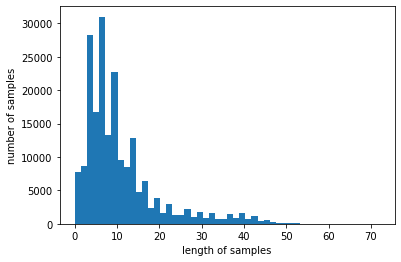

In [53]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :', max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :', sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [54]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window=5, min_count=5, workers =4, sg=0)

In [55]:
# 사이즈

model.wv.vectors.shape

(16477, 100)

In [56]:
print(model.wv.most_similar("최민식"))
print(model.wv.most_similar("히어로"))

[('한석규', 0.8720081448554993), ('안성기', 0.8522822260856628), ('송강호', 0.848280668258667), ('김명민', 0.8455771803855896), ('이정재', 0.8442631959915161), ('엄정화', 0.8346402645111084), ('엄태웅', 0.832843542098999), ('이민호', 0.8297013640403748), ('유해진', 0.8292660713195801), ('설경구', 0.8271686434745789)]
[('호러', 0.9044381380081177), ('슬래셔', 0.8983699083328247), ('무협', 0.8781575560569763), ('무비', 0.8532706499099731), ('느와르', 0.8523597717285156), ('블록버스터', 0.8365192413330078), ('정통', 0.8291299939155579), ('판타지', 0.8155695199966431), ('블랙', 0.8098891377449036), ('물의', 0.8078872561454773)]


## 사전 훈련된 워드 임베딩

In [58]:
import gensim

In [59]:
model = gensim.models.Word2Vec.load("/content/drive/MyDrive/dataset/ko.bin")


nodeldkjf

In [60]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [70]:
sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1]
# 긍정, 부정

In [62]:
# 토큰화

t = Tokenizer()
t.fit_on_texts(sentences)
vocab_size = len(t.word_index) + 1

print(vocab_size)

16


In [63]:
# 인코딩
# sentences 정수화

x_encoded = t.texts_to_sequences(sentences)
print(x_encoded)

[[1, 2, 3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 15]]


In [65]:
# 가장 길이가 긴것?

max_len = max(len(l) for l in x_encoded)
print(max_len)

4


In [71]:
# Padding
# 길이가 제각각 이므로
# 제일 긴 단어를 기준으로 길이를 맞춰줄것
# 길이 짧은 단어에는 0을 붙여 긴 단어랑 길이를 맞춰주는것

x_train = pad_sequences(x_encoded, maxlen = max_len, padding = "post")
# post이므로 뒤쪽에 패딩(0을 붙임)을 줌
y_train = np.array(y_train)

print(x_train)

[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

In [78]:
model = Sequential()
model.add(Embedding(vocab_size, 4, input_length = max_len))
# 차원을 무조건 4로 맞춰주겠다는것
model.add(Flatten())
# 모델 평평하게 해주기 위함
model.add(Dense(1, activation = "sigmoid"))
# dense로 학습 시킴, sigmoid로 output

In [79]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 4)              64        
_________________________________________________________________
flatten_1 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [80]:
# 학습

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = "acc")
model.fit(x_train, y_train, epochs = 100, verbose = 2)

Epoch 1/100
1/1 - 3s - loss: 0.6851 - acc: 0.7143
Epoch 2/100
1/1 - 0s - loss: 0.6833 - acc: 0.7143
Epoch 3/100
1/1 - 0s - loss: 0.6814 - acc: 0.7143
Epoch 4/100
1/1 - 0s - loss: 0.6796 - acc: 0.7143
Epoch 5/100
1/1 - 0s - loss: 0.6777 - acc: 0.7143
Epoch 6/100
1/1 - 0s - loss: 0.6759 - acc: 0.7143
Epoch 7/100
1/1 - 0s - loss: 0.6740 - acc: 0.7143
Epoch 8/100
1/1 - 0s - loss: 0.6721 - acc: 0.7143
Epoch 9/100
1/1 - 0s - loss: 0.6703 - acc: 0.7143
Epoch 10/100
1/1 - 0s - loss: 0.6684 - acc: 0.7143
Epoch 11/100
1/1 - 0s - loss: 0.6666 - acc: 0.7143
Epoch 12/100
1/1 - 0s - loss: 0.6647 - acc: 0.8571
Epoch 13/100
1/1 - 0s - loss: 0.6629 - acc: 0.8571
Epoch 14/100
1/1 - 0s - loss: 0.6610 - acc: 0.8571
Epoch 15/100
1/1 - 0s - loss: 0.6592 - acc: 0.8571
Epoch 16/100
1/1 - 0s - loss: 0.6573 - acc: 0.8571
Epoch 17/100
1/1 - 0s - loss: 0.6554 - acc: 0.8571
Epoch 18/100
1/1 - 0s - loss: 0.6535 - acc: 0.8571
Epoch 19/100
1/1 - 0s - loss: 0.6517 - acc: 0.8571
Epoch 20/100
1/1 - 0s - loss: 0.6498 - a